In [2]:
import numpy as np
! pip install qutip
import qutip as qt
from matplotlib import pyplot as plt
from scipy.special import hermite

In [3]:
# ### Define system parameters

N = 100  # Size of the Hilbert space
omega = 1.0  # Oscillator frequency
m = 1.0  # Mass of the particle
hbar = 1.0  # Planck's constant in natural units

# Position and momentum scaling factors
x_0 = 1 / np.sqrt(2 * m * omega)  # x_0: characteristic length scale
p_0 = np.sqrt(m * omega / 2)  # p_0: characteristic momentum scale

# ### Define operators for the quantum harmonic oscillator

a = qt.destroy(N)  # Annihilation operator
id_op = qt.identity(N)  # Identity operator
n_op = a.dag() * a  # Number operator

x_op = (a + a.dag()) * x_0  # Position operator
p_op = -1j * (a - a.dag()) * p_0  # Momentum operator

# Hamiltonian of the harmonic oscillator
H0 = omega * (a.dag() * a + 0.5 * id_op)

# Alternatively: 
# H0 = p ** 2 / (2 * m) + m * (omega * x) ** 2 / 2


c:\Users\tahab\anaconda3\envs\q_cupy\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\tahab\anaconda3\envs\q_cupy\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


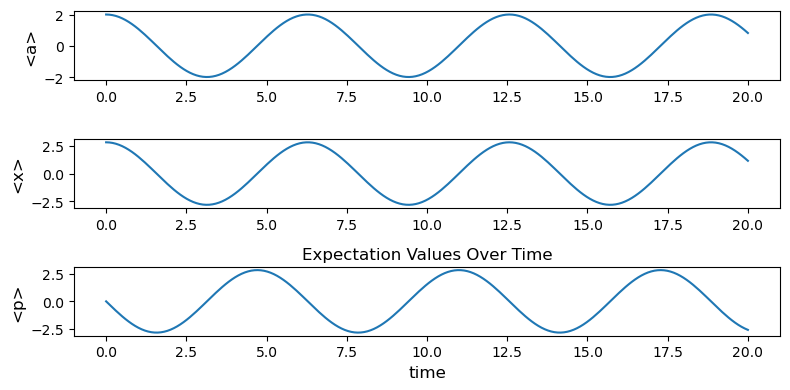

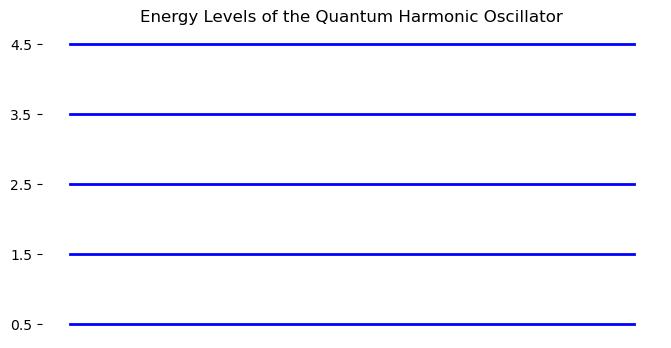

In [4]:
# ### Set up the initial state of the system

# Define a coherent state as the initial state
alpha = 2.0
psi0 = qt.coherent(N, 2)

# ### Define observables for tracking

e_ops = [a, x_op, p_op]  # Operators to track expectation values of

# ### Time evolution parameters

times = np.linspace(0, 20, 200)  # Time array

# ### Time evolution of the system

# Using mesolve to simulate time evolution
result = qt.mesolve(H0, psi0, times, [], e_ops)

# ### Plot expectation values of observables over time
fig1 = plt.figure(figsize=(8, 4))

qt.plot_expectation_values(result, ylabels=['<a>', '<x>', '<p>'],fig=fig1)
plt.title("Expectation Values Over Time")
plt.tight_layout()
plt.show()

# ### Energy levels of the Hamiltonian
N_levels = 5
levels_name = ['|%i>'%(lvl) for lvl in range(N_levels)]

fig2 = plt.figure(figsize=(8, 4))
qt.plot_energy_levels([H0/omega], N=N_levels, h_labels=None,fig=fig2)
plt.title("Energy Levels of the Quantum Harmonic Oscillator")
plt.show()


The Ehrenfest Theorem provides a bridge between quantum mechanics and classical mechanics by describing the time evolution of expectation values. Specifically, it states that for position `x` and momentum `p`, the time evolution of their quantum expectation values follows the classical equations of motion.

The theorem for a particle in a potential `V(x)` is given by:
$$
\frac{d}{dt} \langle x \rangle = \frac{\langle p \rangle}{m}, \quad \frac{d}{dt} \langle p \rangle = - \left\langle \frac{dV}{dx} \right\rangle =  - m \omega^2 \left\langle x \right\rangle
$$

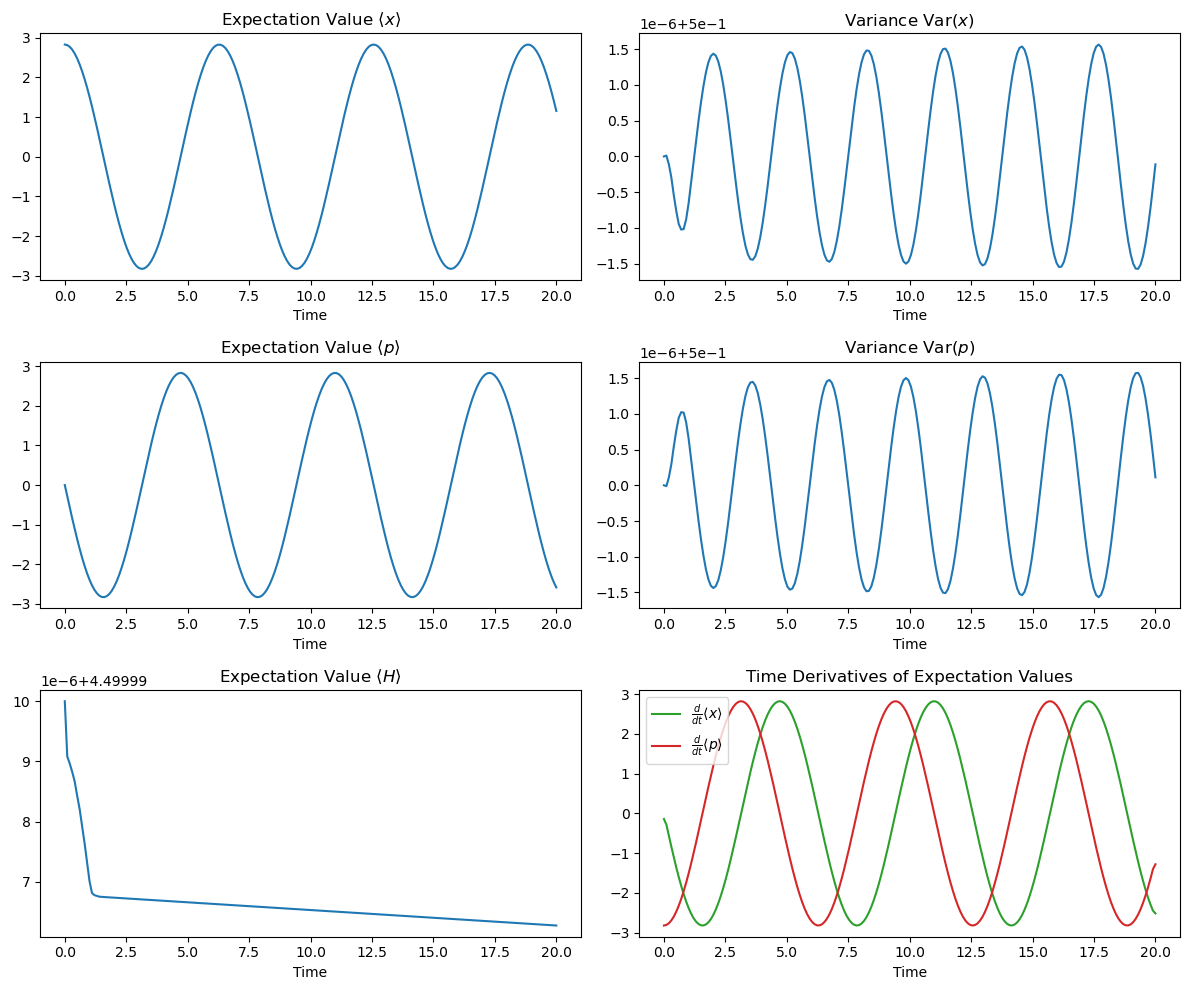

In [5]:
# ### Calculate expectation values, variances, and derivatives
# Using mesolve to simulate time evolution
result = qt.mesolve(H0, psi0, times, [])

expect_vals = [np.real([qt.expect(op, state) for state in result.states]) for op in [x_op, p_op, H0]]
variances = [np.real([qt.variance(op, state) for state in result.states]) for op in [x_op, p_op]]
x_dot, p_dot = [np.gradient(vals, times[1] - times[0]) for vals in expect_vals[:2]]

# ### Plotting results for expectation values, variances, and derivatives

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
labels = [r"$\langle x \rangle$", r"$\langle p \rangle$", r"$\langle H \rangle$"]

# Expectation values
for i, vals in enumerate(expect_vals):
    axs[i, 0].plot(times, vals, label=labels[i])
    axs[i, 0].set_title(f"Expectation Value {labels[i]}")
    axs[i, 0].set_xlabel("Time")

# Variances
var_labels = [r"$\text{Var}(x)$", r"$\text{Var}(p)$"]
for i, var in enumerate(variances):
    axs[i, 1].plot(times, var, label=var_labels[i])
    axs[i, 1].set_title(f"Variance {var_labels[i]}")
    axs[i, 1].set_xlabel("Time")

# Time derivatives of expectation values
axs[2, 1].plot(times, x_dot, label=r"$\frac{d}{dt}\langle x \rangle$", color="tab:green")
axs[2, 1].plot(times, p_dot, label=r"$\frac{d}{dt}\langle p \rangle$", color="tab:red")
axs[2, 1].set_title("Time Derivatives of Expectation Values")
axs[2, 1].set_xlabel("Time")
axs[2, 1].legend()

plt.tight_layout()
plt.show()

In [6]:
def evolve_QHO(N_HS, omega, state, times):

    # ### Define operators for the quantum harmonic oscillator
    a = qt.destroy(N_HS)  # Annihilation operator
    id_op = qt.identity(N_HS)  # Identity operator

    # Hamiltonian of the harmonic oscillator
    H0 = omega * (a.dag() * a + 0.5 * id_op)
    result = qt.mesolve(H0, state, times, [])
    return result.states



In [34]:
from scipy.special import factorial, gammaln
def osc_wf(x_zpf,n,x):
    """
    Calculate the wavefunction in the position representation from the analytical solution.
    
    Parameters:
    - x_zpf: float, position zero point fluctuation
    - n: int, fock state number
    - x: array, position grid points
    
    Returns:
    - psi_x: array, the wavefunction in position representation 
    """
    H = hermite(n) # Hermite polynomial of degree n

    if n <= 170:
        return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H(x/(x_zpf*np.sqrt(2)))* np.math.factorial(n)**-.5 * np.exp(-x**2/(4*x_zpf**2))
    else:
        # # Scaled position
        # xi = np.sqrt(2 * n + 1)* x/(x_zpf*np.sqrt(2))

        # # Asymptotic expansion (valid for large n)
        # H_asymptotic = np.exp(-xi**2 / 2) * (1 - xi**2 / (2 * n + 1))

        sqrt_n_factorial =np.exp( gammaln(n + 1)/2)
        return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H(x/(x_zpf*np.sqrt(2))) * np.exp(-x**2/(4*x_zpf**2)) / sqrt_n_factorial
        # return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H_asymptotic * np.exp(-x**2/(4*x_zpf**2)) / sqrt_n_factorial

def eigen_wf(x_zpf, x, state_vector):
    """
    Calculate the wavefunction in the position representation from the analytical solution.
    
    Parameters:
    - x_zpf: float, position zero point fluctuation
    - state_vector: Qobj, quantum state in the Fock basis
    - x: array, position grid points
    
    Returns:
    - psi_x: array, the wavefunction in position representation 
    """
    # Initialize the wavefunction to 0
    wf = np.zeros_like(x, dtype=complex)
    
    for n, coeff in enumerate(state_vector):
        wf += coeff[0] * osc_wf(x_zpf,n,x) # add the n fock state component to the total wavefunction
    return wf

def eigen_wf_p_representation(psi_x, x_values, hbar=1.0):
    """
    Calculate the wavefunction in the momentum representation from the position representation.
    
    Parameters:
    - psi_x: array, the wavefunction in position representation 
    - x_values: array, the x grid points where psi_x is defined
    - hbar: float, reduced Planck's constant (default is 1 for convenience)
    
    Returns:
    - p_values: array, the momentum grid points
    - psi_p: array, the wavefunction in momentum representation 
    """
    # Calculate spacing in x space
    dx = x_values[1] - x_values[0]
    N = len(x_values)
    
    # Calculate the momentum grid values
    p_values = np.fft.fftfreq(N, d=dx) * 2 * np.pi * hbar

    # Fourier transform and scaling factor
    psi_p = np.fft.fft(psi_x) * dx / np.sqrt(2 * np.pi * hbar)
    
    # Re-order the FFT output and corresponding p values to match increasing p order
    p_values = np.fft.fftshift(p_values)
    psi_p = np.fft.fftshift(psi_p)

    return p_values, psi_p

def classical_tp_abs(omega,m,n,hbar):
    """
    Calculate the classical turning point.
    """
    return np.sqrt(2*hbar/ (omega*m) * (n + .5))


## Exploring Quantum States in QuTiP

Quantum states form the foundation of quantum mechanics, and understanding their properties is essential for studying quantum systems. In this notebook, we will explore some important types of quantum states using QuTiP, focusing on **Fock states**, **coherent states**, and **squeezed states**.

### Fock States

Fock states, also known as **number states**, are eigenstates of the quantum harmonic oscillator and form a convenient basis for representing quantum states. They are defined as states with a definite number of quanta, making them ideal for theoretical analysis.

### Coherent States

**Coherent states** are a special class of quantum states that exhibit classical-like behavior. A coherent state, denoted as $ |\alpha\rangle $, is defined as:
$$
|\alpha\rangle = e^{-\frac{|\alpha|^2}{2}} \sum_{n=0}^\infty \frac{\alpha^n}{\sqrt{n!}} |n\rangle
$$
where  $\alpha$ is a complex number representing the amplitude of the state.

Coherent states are remarkable because they **minimize the uncertainty in position $<X>$ and momentum $<P>$**, satisfying the Heisenberg uncertainty principle with equality. Moreover, they distribute the uncertainty equally between the X and P quadratures. 

Another intriguing property of coherent states is that their **expectation values for $<X>$ and $<P>$ evolve in time like their classical counterparts**, providing an example of the **correspondence principle** between quantum and classical mechanics.

These states can be generated from the vacuum state $ |0\rangle $ using the **displacement operator**:
$$
D(\alpha) = e^{\alpha a^\dagger - \alpha^* a}
$$
where $ a $ and $a^\dagger$ are the annihilation and creation operators.

### Squeezed States

While coherent states minimize the uncertainty equally between the $<X>$ and $<P>$ quadratures, it is possible to redistribute the uncertainty asymmetrically while still satisfying the uncertainty principle. This is achieved using **squeezed states**.

A **squeezed state** can be thought of as a coherent state where the uncertainty in one quadrature (e.g., \(X\)) is reduced (squeezed), making the wavefunction narrower and the peak sharper. However, this comes at the cost of increasing the uncertainty in the other quadrature (e.g., \(P\)), ensuring the uncertainty principle still holds.

Squeezed states are generated by applying the **squeezing operator** to a quantum state:
$$
S(r) = e^{\frac{1}{2} r (a^2 - {a^\dagger}^2)}
$$
where $ r $ is the squeezing parameter that controls the amount of squeezing. To obtain a gaussian wavefunction with a different width $x_s$ in the x-representation, we can apply the squeezing operator with $r=ln(x_0/x_s)$ to the ground state $ |0\rangle $


C:\Users\tahab\AppData\Local\Temp\ipykernel_20908\379666114.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H(x/(x_zpf*np.sqrt(2)))* np.math.factorial(n)**-.5 * np.exp(-x**2/(4*x_zpf**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


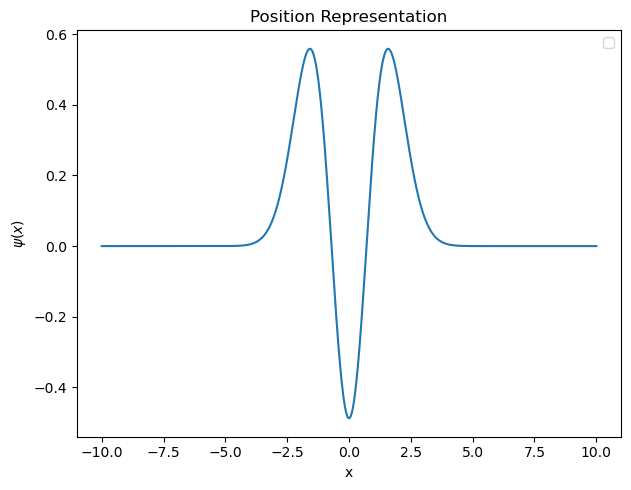

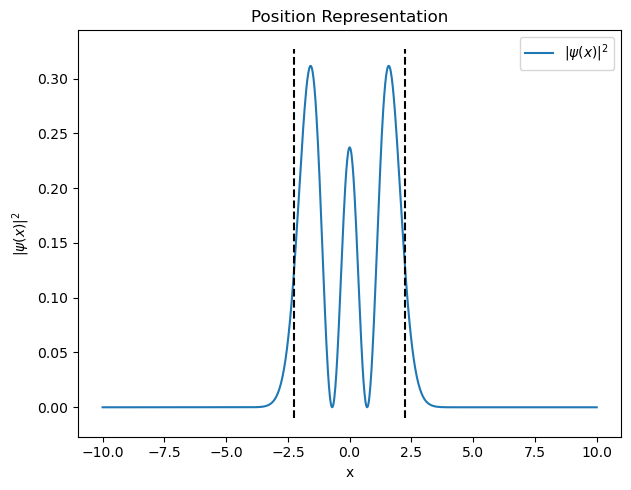

In [25]:
x_values = np.linspace(-10, 10, 1001)
N_HS = 30
n_fock = 2
state = qt.basis(N_HS,n_fock)
psi_x = eigen_wf(x_0, x_values, state)

plt.figure(figsize=(12, 5))

# Position representation
plt.subplot(1, 2, 1)
plt.plot(x_values, psi_x)
plt.xlabel("x")
plt.ylabel(r"$\psi(x)$")
plt.title("Position Representation")
plt.legend()

plt.tight_layout()
plt.show()


prob_x = np.abs(psi_x)**2

# ### Plot probability densities in position and momentum spaces

plt.figure(figsize=(12, 5))

# Position representation
plt.subplot(1, 2, 1)
plt.plot(x_values, prob_x, label=r"$|\psi(x)|^2$")
plt.vlines([classical_tp_abs(omega,m,n_fock,1),-classical_tp_abs(omega,m,n_fock,1)],ymin=-0.01,ymax=1.05*max(prob_x),linestyles='dashed',colors='black')
plt.xlabel("x")
plt.ylabel(r"$|\psi(x)|^2$")
plt.title("Position Representation")
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\tahab\AppData\Local\Temp\ipykernel_20908\379666114.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H(x/(x_zpf*np.sqrt(2)))* np.math.factorial(n)**-.5 * np.exp(-x**2/(4*x_zpf**2))


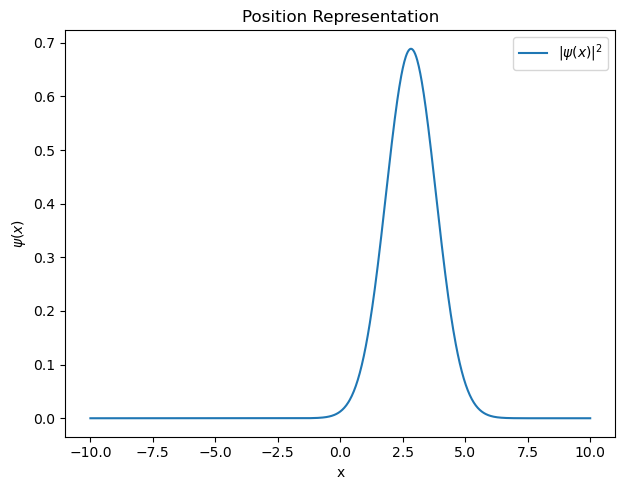

In [26]:
x_values = np.linspace(-10, 10, 1001)
N_HS = 30
alpha = 2
state = qt.coherent(N_HS,alpha)
psi_x = eigen_wf(x_0, x_values, state)

plt.figure(figsize=(12, 5))

# Position representation
plt.subplot(1, 2, 1)
plt.plot(x_values, psi_x, label=r"$|\psi(x)|^2$")
plt.xlabel("x")
plt.ylabel(r"$\psi(x)$")
plt.title("Position Representation")
plt.legend()

plt.tight_layout()
plt.show()

In the case of squeezed states you see that there is an impact due to the dimensionality of our system, we can plot the real expected ground state with a given variance and the squeezed state which represent the same quantum state, but in one case we see oscillations which shouldn't exist. This comes from the way we are using these states: in the second case, we act 'physically' on the ground state by squeezing it, meaning that the change of variance in x doesn't come from a renormalization but by the act of literally constraining and squeezing the oscillator around x=0. This is relevant because the basis we use in qutip (fock Basis) is describing fock states with actually width of x_0 as we defined our Hamiltonian using this parameter. Moreover, in order to use the time evolution built in qutip, we need the correct physical state, thus we use here the second case to obtain the 'correct' behaviour provided numerical errors. To represent efficiently and accurately the time evolution of the squeezed vacuum, we can use the Schrodinger equation to solve numerically for the time dependence. We sill stick here with qutip.

# Squeezed States and Dimensionality Effects in Simulations

In the case of squeezed states, the dimensionality of our Hilbert space impacts how these states are represented. We can compare two representations of the squeezed ground state:

1. **Mathematical Construction:** This approach directly creates a squeezed state with the expected variance. However, it doesn't build a quantum object we can use for qutip manipulation.
2. **Physical Construction:** This method applies the squeezing operator directly to the vacuum state. Here, the change in variance of \( x \) results not from a renormalization factor but from the physical action of squeezing the oscillator around \( x=0 \). Nonetheless, this method is subject to numrical errors as numerical errors rise with higher number states required to represent the squeezed state this way.

This distinction arises from how these states are constructed and used. The second approach more accurately reflects the physical process of squeezing, aligning with how variance changes in a real quantum system.

This is particularly relevant because the Fock basis used in QuTiP describes quantum harmonic oscillator states, where the width is characterized by \( x_0 \) (the position uncertainty of the ground state as defined in our Hamiltonian). To ensure physically meaningful results, especially when using QuTiP's built-in time evolution solvers, it is crucial to start with the correctly constructed physical state.

Here, we use the physically squeezed vacuum state to achieve correct behavior using qutip, subject to numerical errors. To accurately represent the time evolution of the squeezed vacuum state, we can use the Schrödinger equation for the wavefunction in x-representation, and solve numerically using differential methods.


C:\Users\tahab\AppData\Local\Temp\ipykernel_20908\379666114.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H(x/(x_zpf*np.sqrt(2)))* np.math.factorial(n)**-.5 * np.exp(-x**2/(4*x_zpf**2))


[-10.    -9.98  -9.96 ...   9.96   9.98  10.  ]


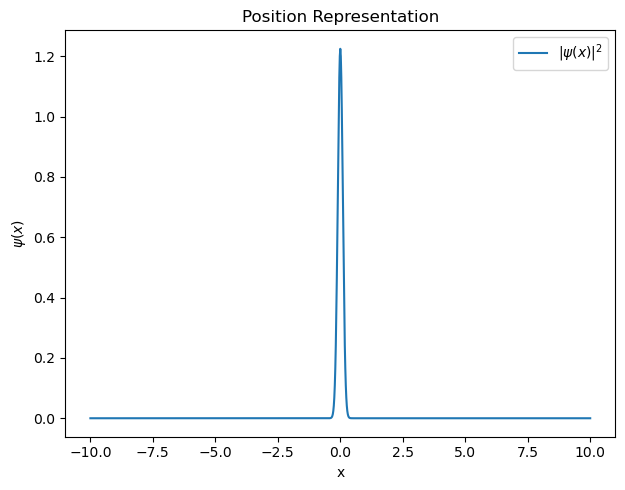

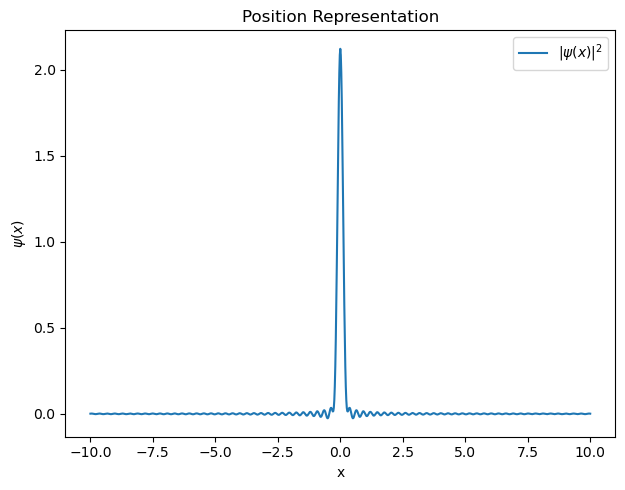

In [27]:
## Mathematical representation of the squeezed vacuum
x_values = np.linspace(-10, 10, 1001)
N_HS = 100
x0_over_xs = 10
state = qt.basis(N_HS,0)
psi_x = eigen_wf(x_0/x0_over_xs, x_values, state)

plt.figure(figsize=(12, 5))

# Position representation
plt.subplot(1, 2, 1)
print(x_values)
plt.plot(x_values, psi_x, label=r"$|\psi(x)|^2$")
plt.xlabel("x")
plt.ylabel(r"$\psi(x)$")
plt.title("Position Representation")
plt.legend()

plt.tight_layout()
plt.show()

## Real representation of the squeezed vacuum in qutip
x_values = np.linspace(-10, 10, 1001)
N_HS = 250
x0_over_xs = 10
r= np.log(x0_over_xs)
state = qt.squeeze(N_HS,r)*qt.basis(N_HS,0)
psi_x = eigen_wf(x_0, x_values, state)

plt.figure(figsize=(12, 5))

# Position representation
plt.subplot(1, 2, 1)
plt.plot(x_values, psi_x, label=r"$|\psi(x)|^2$")
plt.xlabel("x")
plt.ylabel(r"$\psi(x)$")
plt.title("Position Representation")
plt.legend()

plt.tight_layout()
plt.show()


c:\Users\tahab\anaconda3\envs\q_cupy\lib\site-packages\scipy\sparse\_base.py:1034: SparseEfficiencyWarning: Constructing a DIA matrix with 249 diagonals is inefficient
  return self.tocoo(copy=copy).todia(copy=False)
C:\Users\tahab\AppData\Local\Temp\ipykernel_20908\379666114.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H(x/(x_zpf*np.sqrt(2)))* np.math.factorial(n)**-.5 * np.exp(-x**2/(4*x_zpf**2))
C:\Users\tahab\AppData\Local\Temp\ipykernel_20908\379666114.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H(x/(x_zpf*np.sqrt(2)))* np.math.factorial(n)**-.5 * np.exp(-x**2/(4*x_zpf**2))
c:\Users\tahab\anaconda3\envs\q_cupy\lib\site-packages\scipy\special\_ortho

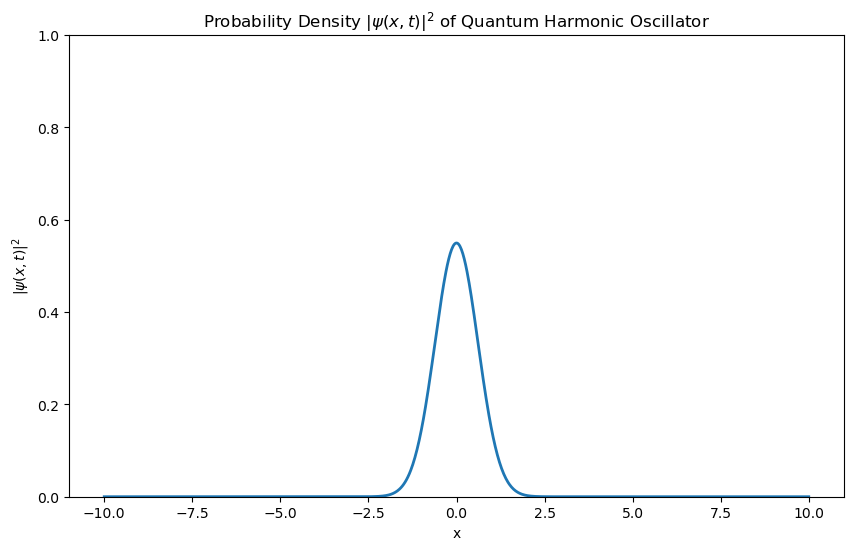

In [33]:
# For question 37, do a = x_0 / 2, x_0 / 5, x_0 / 10 instead of x_0 / 2, x_0 / 10, x_0/100
x_values = np.linspace(-10, 10, 1001)
N_HS = 250
x0_over_xs = 2
r= np.log(x0_over_xs)
state = qt.squeeze(N_HS,r)*qt.basis(N_HS,0)

states_vs_time = evolve_QHO(N_HS, omega, state, times=np.linspace(0,10,300))

# Set up figure for the animation of probability density
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x_values, np.abs(eigen_wf(x_0, x_values, states_vs_time[0]))**2, lw=2)
ax.set_ylim(0, 1)
ax.set_xlabel("x")
ax.set_ylabel(r"$|\psi(x, t)|^2$")
ax.set_title("Probability Density $|\psi(x, t)|^2$ of Quantum Harmonic Oscillator")

# Animation function to update the probability density
def animate(i):
    psi_t = states_vs_time[i]  # Get state at time step i
    line.set_ydata(np.abs(eigen_wf(x_0, x_values, psi_t))**2)
    return line,

from IPython.display import HTML
from matplotlib.animation import FuncAnimation, PillowWriter

# Run and display the animation in the notebook
ani = FuncAnimation(fig, animate, frames=len(times), interval=100, blit=True)
# ani.save("quantum_oscillator.mp4", writer="ffmpeg")
HTML(ani.to_jshtml())

C:\Users\tahab\AppData\Local\Temp\ipykernel_20908\379666114.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H(x/(x_zpf*np.sqrt(2)))* np.math.factorial(n)**-.5 * np.exp(-x**2/(4*x_zpf**2))


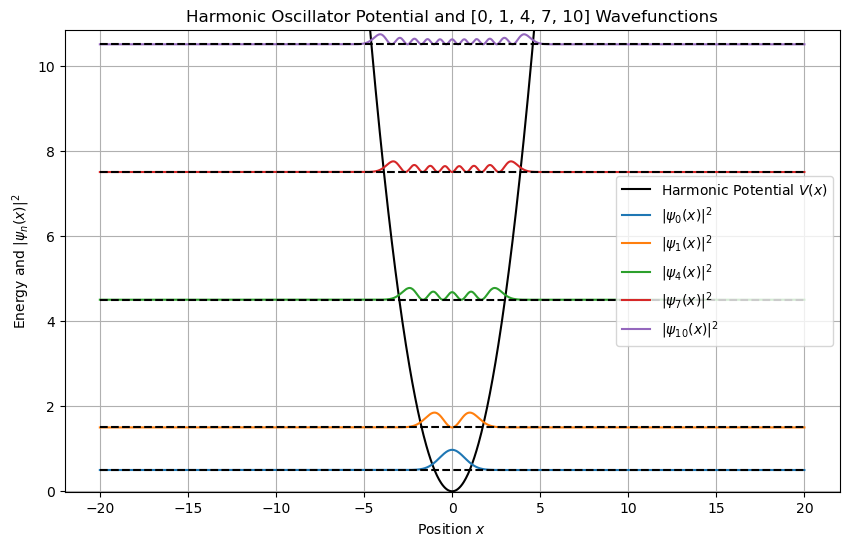

In [29]:
def harmonic_potential(x, omega, m=1):
    """
    Harmonic oscillator potential function.
    V(x) = 0.5 * m * omega^2 * x^2
    """
    return 0.5 * m * omega**2 * x**2

def plot_harmonic_oscillator_wavefunctions(x_0=np.sqrt(2)**-1, n_states=[5], omega=1.0, x_values=np.linspace(-8,8,100)):
    """
    Plots the harmonic oscillator potential and the first n_states wavefunctions.
    
    Parameters:
    - n_states: int, number of wavefunctions to plot
    - omega: float, oscillator frequency
    - x_min, x_max: float, range for x values in the plot
    - num_points: int, number of points to calculate for x
    """
    # Calculate the potential
    potential = harmonic_potential(x_values, omega)
    
    # Initialize the plot
    plt.figure(figsize=(10, 6))
    
    # Plot the potential
    plt.plot(x_values, potential, label="Harmonic Potential $V(x)$", color='black', linestyle="-")
    
    # Plot each wavefunction, scaling it to fit with the potential for visibility
    for n in n_states:
        psi_n = osc_wf(x_0,n,x_values)
        
        # Scale and shift wavefunction plot for better visibility
        plt.plot(x_values, psi_n**2 + (n+.5) * omega, label="$|\psi_{%i}(x)|^2$"%(n))

        plt.hlines((n+.5) * omega, xmin=min(x_values), xmax=max(x_values), linestyles='dashed', colors='black')
    
    # Customize plot
    plt.xlabel("Position $x$")
    plt.ylabel("Energy and $|\psi_n(x)|^2$")
    plt.title(f"Harmonic Oscillator Potential and {n_states} Wavefunctions")
    minval = -0.01 if n_states[0]<5 else 0.99*(n_states[0]+.5) * omega
    plt.ylim([minval,1.01*max(psi_n**2+ (n+.5) * omega)])
    plt.legend()
    plt.grid()
    plt.show()


# Example: Plot the first wavefunctions of the harmonic oscillator with ω = 1.0
plot_harmonic_oscillator_wavefunctions(n_states=[0,1,4,7,10], omega=1.0, x_values=np.linspace(-20,20,1000))

In [30]:

def find_extrema_distances_array(f_values, x_values, num_extrema=10, tolerance=None):
    """
    Find the positions of the extrema and distances between consecutive extrema.
    
    Parameters:
    - f_values: array-like, values of the function at points x_values
    - x_values: array-like, the x-values at which f_values are given
    - num_extrema: int, the maximum number of extrema to consider
    - tolerance: float, the minimum separation between extrema (in x units).
                 If None, defaults to 1.5 times the x spacing.
    
    Returns:
    - extrema_positions: list, x-positions of the extrema
    - extrema_distances: list, distances between consecutive extrema
    """
    # Set default tolerance based on x_values step size if not provided
    if tolerance is None:
        tolerance = 1.5 * (x_values[1] - x_values[0])

    # Find where the derivative changes sign to locate extrema
    derivative = np.diff(f_values)
    sign_changes = np.where(np.diff(np.sign(derivative)))[0] + 1  # +1 for alignment with x_values indexing

    # Initialize lists to store extrema positions and filter duplicates
    extrema_positions = []
    last_extremum = None

    for idx in sign_changes:
        x_extremum = x_values[idx]
        
        # Filter based on tolerance to avoid close duplicate extrema
        if last_extremum is None or abs(x_extremum - last_extremum) > tolerance:
            extrema_positions.append(x_extremum)
            last_extremum = x_extremum
        
        # Stop if we've collected the desired number of extrema
        if len(extrema_positions) >= num_extrema:
            break

    # Calculate distances between consecutive extrema
    extrema_distances = np.diff(extrema_positions)

    return extrema_positions, extrema_distances

def find_wavelength(list):
    """
    Find the distance between extrema i and extrema i+2 around x=0
    
    Parameters:
    - list: list, distances between consecutive extrema
    Returns:
    - wavelength: float, wavefunction de Broglie wavelength

    """
    length = len(list)  

    first_middle_index = length // 2 
    second_middle_index = length // 2 - 1 

    wavelength = list[first_middle_index] + list[second_middle_index]

    return wavelength


def DeBroglie_wavelength(n_array, x_0, x_values):
    DeBroglie_wavelength_vs_n = []
    for n in n_array:
        psi_n = osc_wf(x_0, n ,x_values)
        _ , extrema_distances = find_extrema_distances_array(psi_n, x_values, num_extrema = n)
        DeBroglie_wavelength_vs_n.append(find_wavelength(extrema_distances))

    return DeBroglie_wavelength_vs_n

In [31]:
# Find the extrema of the amplitude and distances between them
psi_n = osc_wf(x_0, 2, x_values)
extrema_positions, extrema_distances = find_extrema_distances_array(psi_n, x_values, num_extrema=10)

C:\Users\tahab\AppData\Local\Temp\ipykernel_20908\379666114.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H(x/(x_zpf*np.sqrt(2)))* np.math.factorial(n)**-.5 * np.exp(-x**2/(4*x_zpf**2))


C:\Users\tahab\AppData\Local\Temp\ipykernel_20908\379666114.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (np.sqrt(2*np.pi*x_zpf)* (2.**n) )**-.5 * H(x/(x_zpf*np.sqrt(2)))* np.math.factorial(n)**-.5 * np.exp(-x**2/(4*x_zpf**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


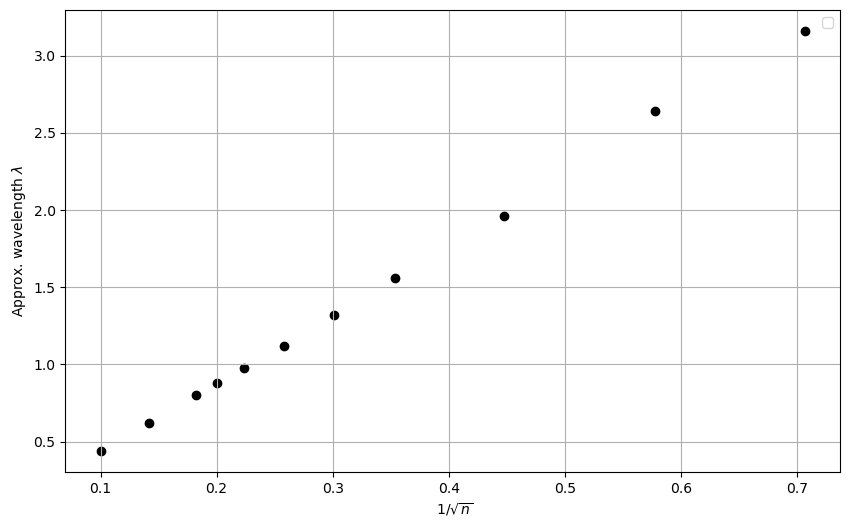

slope: 4.528496202101158
theoretical slope: 4.442882938158366


In [32]:
n_values = [2, 3, 5, 8, 11, 15, 20, 25, 30, 50, 100]

l_approx = DeBroglie_wavelength(n_values, x_0, x_values)

plt.figure(figsize=(10, 6))
plt.scatter(np.asarray(n_values)**-.5, l_approx, color='black', linestyle="-")

# Customize plot
plt.xlabel(" $1 / \sqrt{n}$")
plt.ylabel("Approx. wavelength $\lambda$")
# plt.title(f"Harmonic Oscillator Potential and {n_states} Wavefunctions")
plt.legend()
plt.grid()
plt.show()

# Perform the linear fit
slope, _= np.polyfit(np.asarray(n_values)**-.5, l_approx, 1)

print("slope:",slope)
print("theoretical slope:", 2*np.pi*x_0)
